In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection

In [2]:
heart_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/Heart%20Disease%20UCI/heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_df.target.unique()

array([1, 0])

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


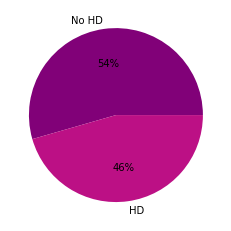

In [5]:
labels = ['No HD', 'HD']
values = heart_df.target.value_counts()/heart_df.target.shape[0]
colors = sns.color_palette('RdPu_r')[0:2]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

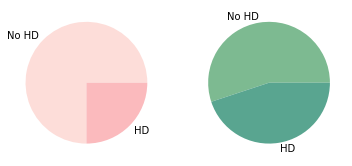

In [6]:
women = heart_df.loc[heart_df.sex == 0]
men = heart_df.loc[heart_df.sex == 1]
labels = ['No HD', 'HD']
values_w = women.target.value_counts()/women.target.shape[0]
values_m = men.target.value_counts()/men.target.shape[0]
colors = [sns.color_palette('RdPu')[0:2], sns.color_palette('crest')[0:2]]

fig, axs = plt.subplots(1, 2)
axs[0].pie(values_w, labels = labels, colors = colors[0])
axs[1].pie(values_m, labels = labels, colors = colors[1])
plt.show()

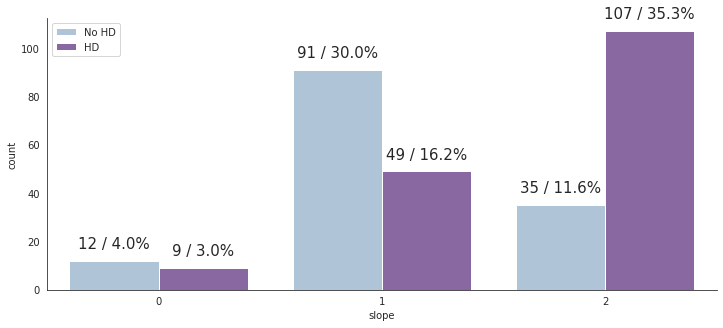

In [7]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.3)
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='slope',hue='target',palette='BuPu')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height} / {height / len(heart_df.target) * 100:2.1f}%', va='center', ha='center', size=15)
plt.legend(labels=labels)
sns.despine()

Text(0.5, 1.0, 'Correlation matrix')

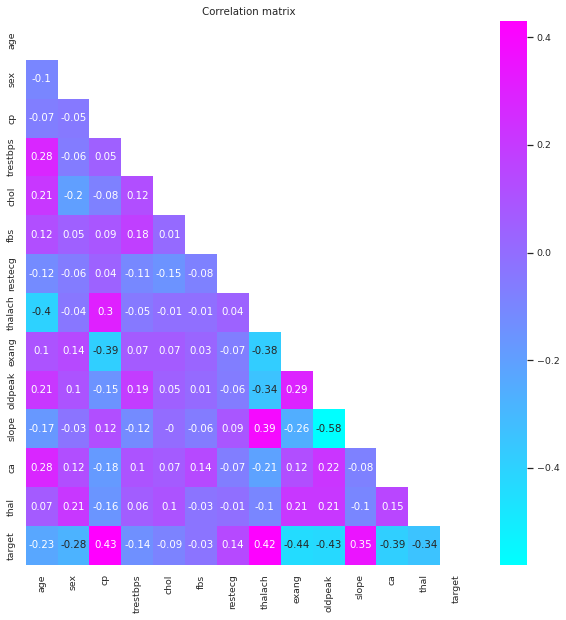

In [8]:
corr=heart_df.corr().round(2)

sns.set(font_scale=0.85)
plt.figure(figsize=(10, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='cool',mask=mask,cbar=True)
plt.title('Correlation matrix')

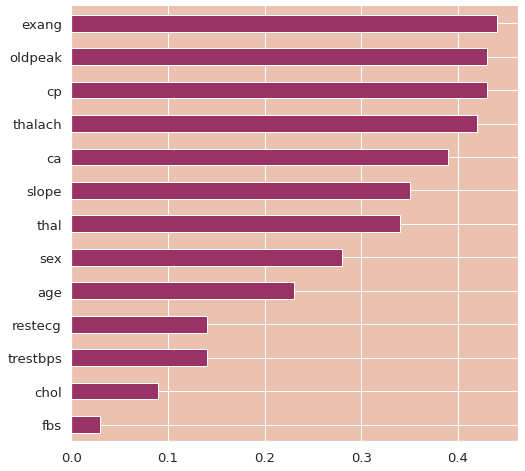

In [9]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8,8))
abs(corr['target']).sort_values()[:-1].plot.barh(color='#993366')
plt.gca().set_facecolor('#ebc2af')
sns.despine()

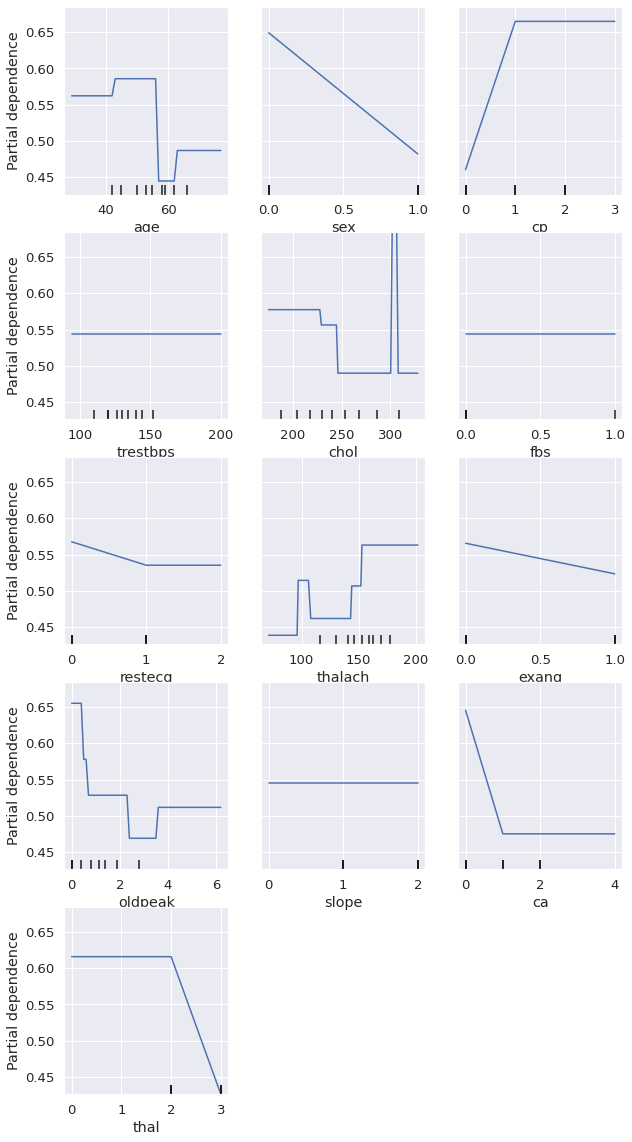

In [10]:
from sklearn.inspection import plot_partial_dependence
tree_classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
X_train_for_tree = heart_df.drop(['target'], axis=1)
y_train_for_tree = heart_df.target
tree_classifier.fit(X_train_for_tree, y_train_for_tree)
fig,ax = plt.subplots(figsize=(10,20))
plot_partial_dependence(tree_classifier, X_train_for_tree, X_train_for_tree.columns, ax=ax,)

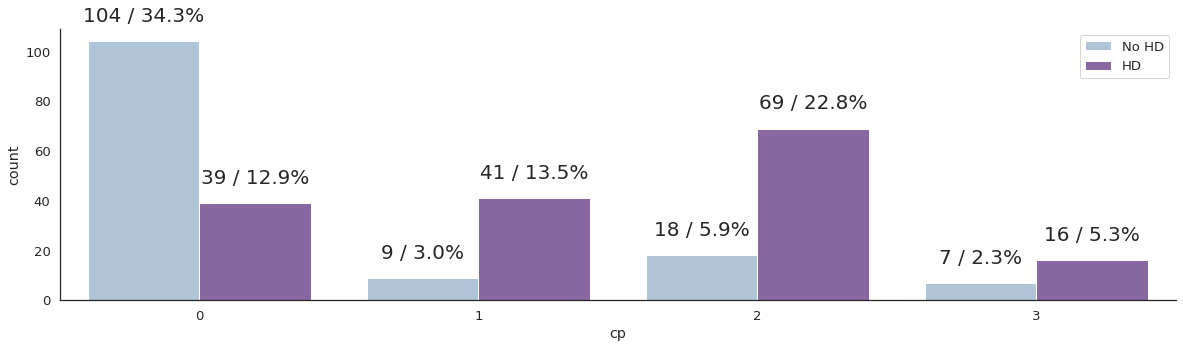

In [11]:
plt.figure(figsize=(20,5))
sns.set_style("white")
ax = sns.countplot(data=heart_df, x='cp',hue='target',palette='BuPu')
for i in ax.patches:
    x, height, width = i.get_x(), i.get_height(), i.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / len(heart_df.target) * 100:2.1f}%', va='center', ha='center', size=20)
plt.legend(labels=labels)
sns.despine()

In [12]:
heart_df_test = heart_df.sample(n=33, random_state=1)
heart_df_train = heart_df.drop(heart_df_test.index)
heart_df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
X_train = heart_df_train.drop(['target'], axis=1)
y_train = heart_df_train.target

In [14]:
parametrs = {'n_estimators':range(5,31,5),
    'max_depth':range(1,13,2),
    'min_samples_leaf':range(1,8),
    'min_samples_split':range(2,4)}
heart_rf = RandomForestClassifier(random_state=0)
search = GridSearchCV(heart_rf, parametrs, n_jobs=-1, cv=3)
search.fit(X_train,y_train)
best_heart_forest = search.best_estimator_ 
X_test = heart_df_test.drop(['target'], axis=1)
y_test = heart_df_test.target
y_test_array = y_test.to_numpy()
predictions = best_heart_forest.predict(X_test)

In [15]:
(predictions == y_test_array).sum()

30

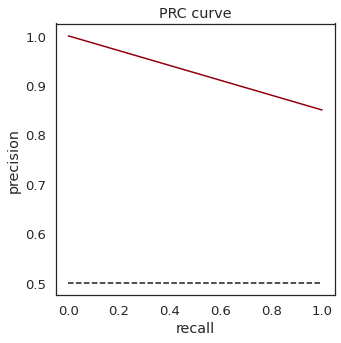

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test_array, predictions)
plt.figure(figsize = (5,5))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, color='#92000a')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve')
plt.show()

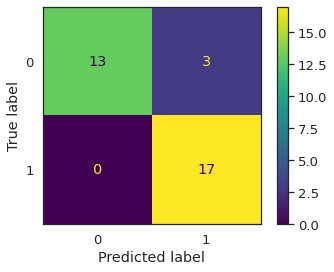

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_heart_forest, X_test, y_test)  
plt.show()

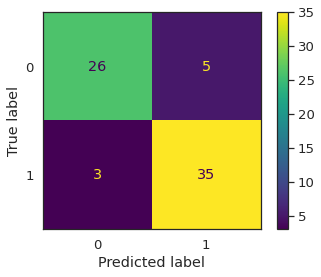

In [18]:
heart_df_test_2 = heart_df.sample(n=69, random_state=25)
X_test_2 = heart_df_test_2.drop(['target'], axis=1)
y_test_2 = heart_df_test_2.target
predictions_2 = best_heart_forest.predict(X_test_2)
plot_confusion_matrix(best_heart_forest, X_test_2, y_test_2)  
plt.show()